# Plot show of UMAP *function* <u>umap.plot.points</u>

### Fitst,we neet to load data from pre-saved files.

In [2]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import OS_Tools_Kit as ot
from scipy.io import arff


pendigits = ot.Load_Variable('pendigits.pkl')
mnist = arff.loadarff(f'mnist_784.arff')
fmnist = arff.loadarff(f'Fashion-MNIST.arff')
mnist_show = pd.DataFrame(mnist[0])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

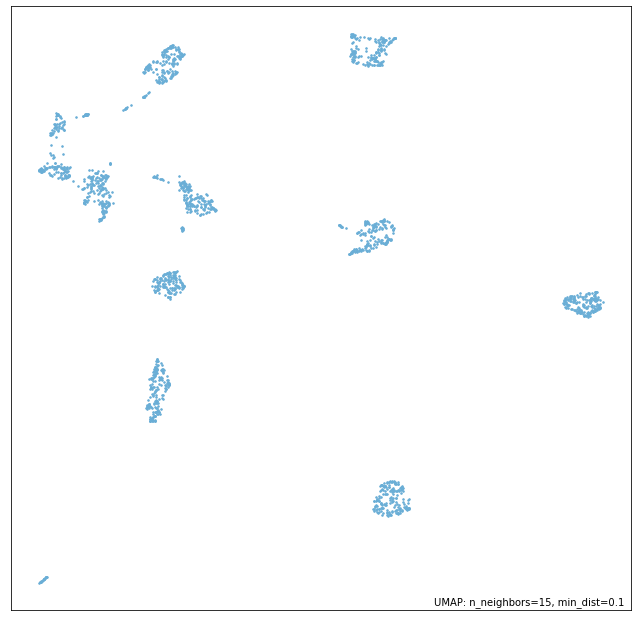

In [5]:
import umap.plot
mapper = umap.UMAP().fit(pendigits.data) # define umap fit of data.
umap.plot.points(mapper)

<AxesSubplot:>

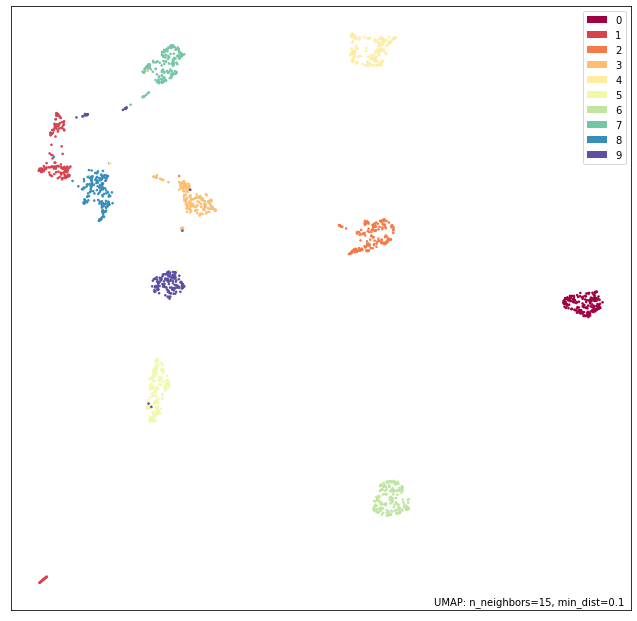

In [6]:
# colorful 
umap.plot.points(mapper, labels=pendigits.target)

<AxesSubplot:>

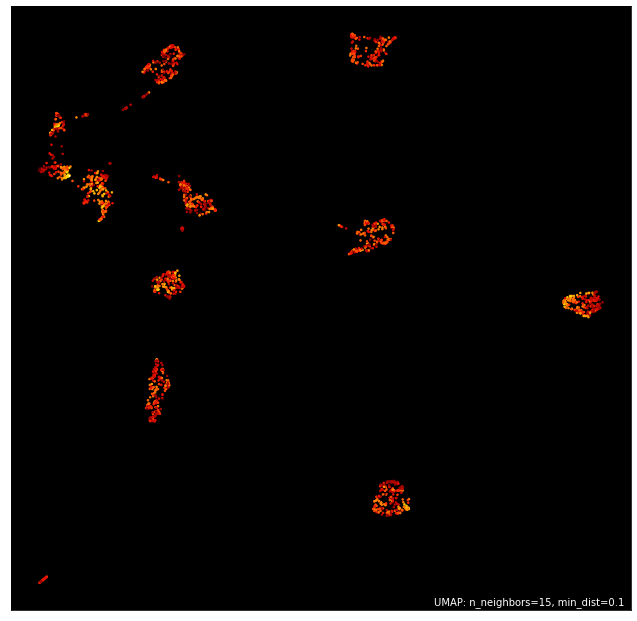

In [7]:
# Heatmap
umap.plot.points(mapper, values=pendigits.data.mean(axis=1), theme='fire')

<AxesSubplot:>

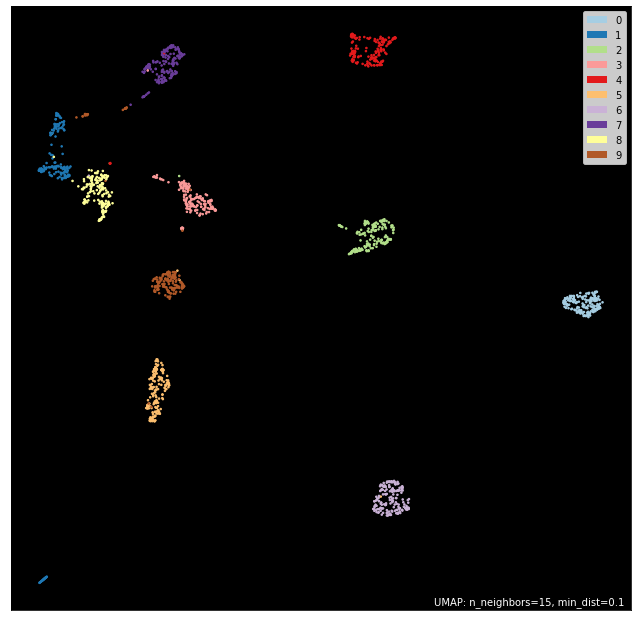

In [8]:
# color with black background.
umap.plot.points(mapper, labels=pendigits.target, color_key_cmap='Paired', background='black')

## Plot larger Datasets.
### We use mnist dataset as an example, 70000 graphs here.

In [30]:
fmnist_data = np.array(pd.DataFrame(fmnist[0]))[:,:-1]

<AxesSubplot:>

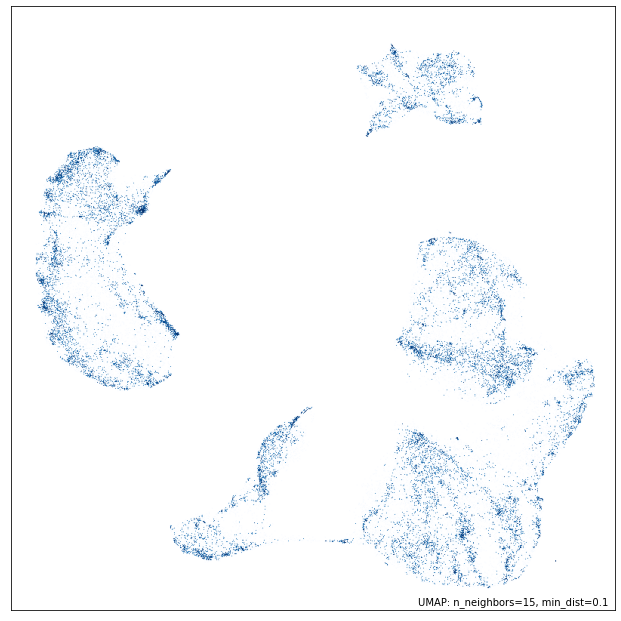

In [34]:
mapper = umap.UMAP().fit(fmnist_data)
umap.plot.points(mapper)

<AxesSubplot:>

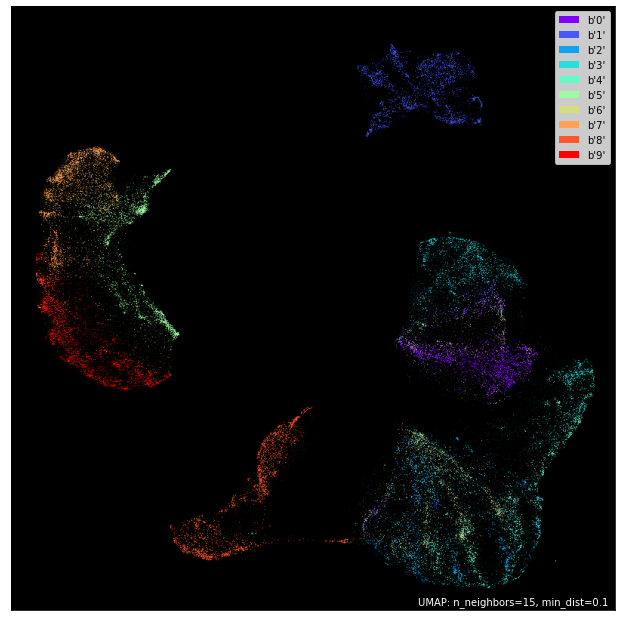

In [39]:
umap.plot.points(mapper, labels=pd.DataFrame(fmnist[0]).iloc[:,-1], theme='fire')

## Interactivable map, using package bokeh.
### Use only previous 30000 frames.

In [102]:
mapper = umap.UMAP().fit(fmnist_data[:30000,:])

In [103]:
# Rename label from number into real item label.
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':pd.DataFrame(fmnist[0]).iloc[:30000,-1]})
hover_data['item'] = hover_data.label.map(
    {
        b'0':'T-shirt/top',
        b'1':'Trouser',
        b'2':'Pullover',
        b'3':'Dress',
        b'4':'Coat',
        b'5':'Sandal',
        b'6':'Shirt',
        b'7':'Sneaker',
        b'8':'Bag',
        b'9':'Ankle Boot',
    }
)

In [104]:
umap.plot.output_notebook()

Loading BokehJS ...

In [105]:
# Transfer data into standard py type (not object), only this can be plotted.
hover_data['item'] = hover_data['item'].astype(str)
hover_data['index'] = hover_data['index'].astype(int)
hover_data['label'] = hover_data['label'].astype(int)

In [106]:
hover_data

,index,label,item
0,0,9,Ankle Boot
1,1,0,T-shirt/top
2,2,0,T-shirt/top
3,3,3,Dress
4,4,0,T-shirt/top
...,...,...,...
29995,29995,3,Dress
29996,29996,6,Shirt
29997,29997,7,Sneaker
29998,29998,0,T-shirt/top


In [107]:
p = umap.plot.interactive(mapper, labels =hover_data['label'],hover_data = hover_data, point_size=2)
umap.plot.show(p)

<AxesSubplot:>

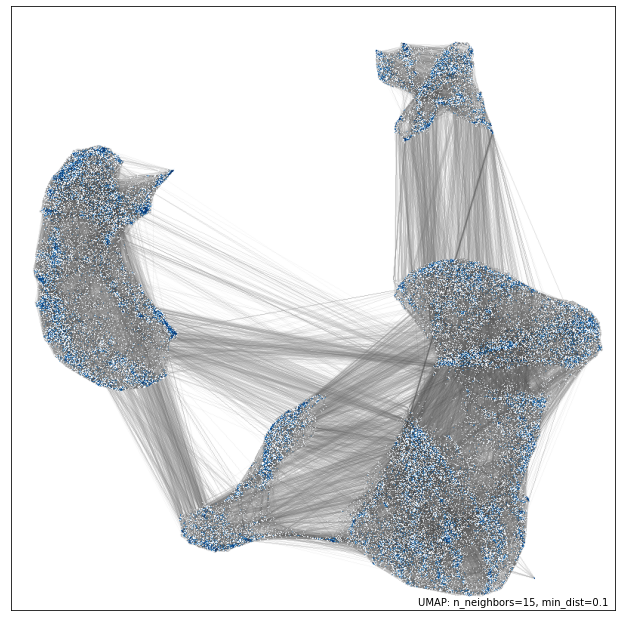

In [65]:
umap.plot.connectivity(mapper, show_points=True)

D:\ZR\Anaconda\envs\caiman\lib\site-packages\umap\plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<AxesSubplot:>

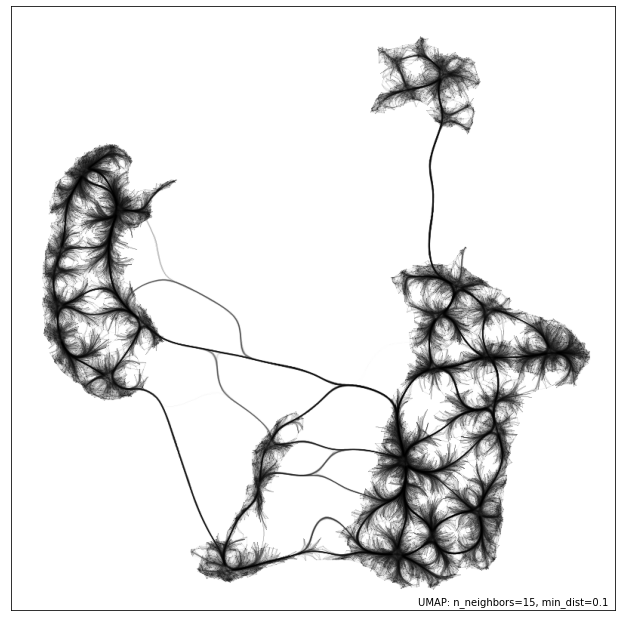

In [108]:
# Using hammer edge to change plot method. Edge_cmap will show all useful visualization methods.
umap.plot.connectivity(mapper, edge_bundling='hammer')